In [1]:
import xarray
import pygmt
import pandas
import numpy as np

In [2]:
ds = xarray.open_dataset("../data/MIROC_inputs/ctrl_MIROCinput.nc", decode_timedelta=False)

In [3]:
ds.info()

xarray.Dataset {
dimensions:
	lat = 128 ;
	lon = 256 ;
	level = 40 ;
	hydro = 9 ;

variables:
	float64 landmask(lat, lon) ;
	float64 skt(lat, lon) ;
	float64 orography(lat, lon) ;
	float64 sunlit(lat, lon) ;
	float64 pfull(level, lat, lon) ;
	float64 height(level, lat, lon) ;
	float64 T_abs(level, lat, lon) ;
	float64 qv(level, lat, lon) ;
	float64 rh(level, lat, lon) ;
	float64 tca(level, lat, lon) ;
	float64 cca(level, lat, lon) ;
	float64 mr_lsliq(level, lat, lon) ;
	float64 mr_lsice(level, lat, lon) ;
	float64 mr_ccliq(level, lat, lon) ;
	float64 mr_ccice(level, lat, lon) ;
	float64 fl_lsrain(level, lat, lon) ;
	float64 fl_lssnow(level, lat, lon) ;
	float64 fl_ccrain(level, lat, lon) ;
	float64 fl_ccsnow(level, lat, lon) ;
	float64 dtau_s(level, lat, lon) ;
	float64 dtau_c(level, lat, lon) ;
	float64 dem_s(level, lat, lon) ;
	float64 dem_c(level, lat, lon) ;
	float64 mr_ozone(level, lat, lon) ;
	float64 phalf(level, lat, lon) ;
	float64 height_half(level, lat, lon) ;
	float64 Reff(

In [4]:
%%capture
data=ds["height"]
data.load()
zbtm=data.isel(level=0)

In [5]:
%%capture
data=ds["height_half"]
data.load()
zbnd=data.isel(level=0)

In [6]:
%%capture
data=ds["orography"]
data.load()
zsfc=data

In [7]:
print(zbtm.values-zbnd.values)

[[-0.01579761 -0.01579004 -0.01578223 ... -0.01581958 -0.0158125
  -0.01580493]
 [-0.01597729 -0.01595679 -0.01593628 ... -0.01603931 -0.0160188
  -0.01599805]
 [-0.015927   -0.01590186 -0.0158772  ... -0.01600537 -0.01597876
  -0.01595264]
 ...
 [-0.0181706  -0.01817583 -0.01818095 ... -0.01815384 -0.01815964
  -0.01816521]
 [-0.01827541 -0.01827885 -0.01828216 ... -0.01826424 -0.01826811
  -0.01827183]
 [-0.01832112 -0.01832272 -0.01832434 ... -0.01831641 -0.01831796
  -0.01831953]]


In [8]:
print(zbnd.values-zsfc.values/1000.)

[[0.03153857 0.03152344 0.03150806 ... 0.03158252 0.03156836 0.03155347]
 [0.03189673 0.03185596 0.03181494 ... 0.03202051 0.03197925 0.03193799]
 [0.03179614 0.03174585 0.03169629 ... 0.0319519  0.03189893 0.03184717]
 ...
 [0.03626075 0.03627118 0.03628141 ... 0.03622731 0.03623889 0.03625001]
 [0.03646997 0.03647683 0.03648343 ... 0.03644769 0.03645542 0.03646284]
 [0.03656127 0.03656447 0.03656769 ... 0.03655187 0.03655497 0.03655811]]


In [9]:
%%capture
data=ds["height"]
data.load()

tid=1
zid=0

In [10]:
print(data.size)

1310720


In [11]:
var = data.isel(level=1)
#lat = ds["lat"].values
#lon = ds["lon"].values

In [12]:
print(var.size)

32768


In [13]:
var.values.sum()/256/128

np.float64(0.44426906154779383)

In [14]:
lon, lat = np.meshgrid(var.lon, var.lat)
ll = np.column_stack([lon.ravel(), lat.ravel(), var.values.ravel()])

grid = pygmt.xyz2grd(
    data=ll,
    region=[ -180, 180, -90, 90 ],
    spacing="1.5d",
)

In [15]:
fig = pygmt.Figure()

In [16]:
region = [ -180, 180, -90, 90 ]

In [17]:
fig.coast(
    region="g",
    projection="W15c",   # Robinson 投影（15 cm 幅）
    land="lightgray",
    water="white",
    frame="af"
)

In [18]:
fig.grdimage(
    grid=grid,
    cmap="turbo",
    shading=True,
)

fig.colorbar(frame="af", position="JBC+w10c/0.5c+h")

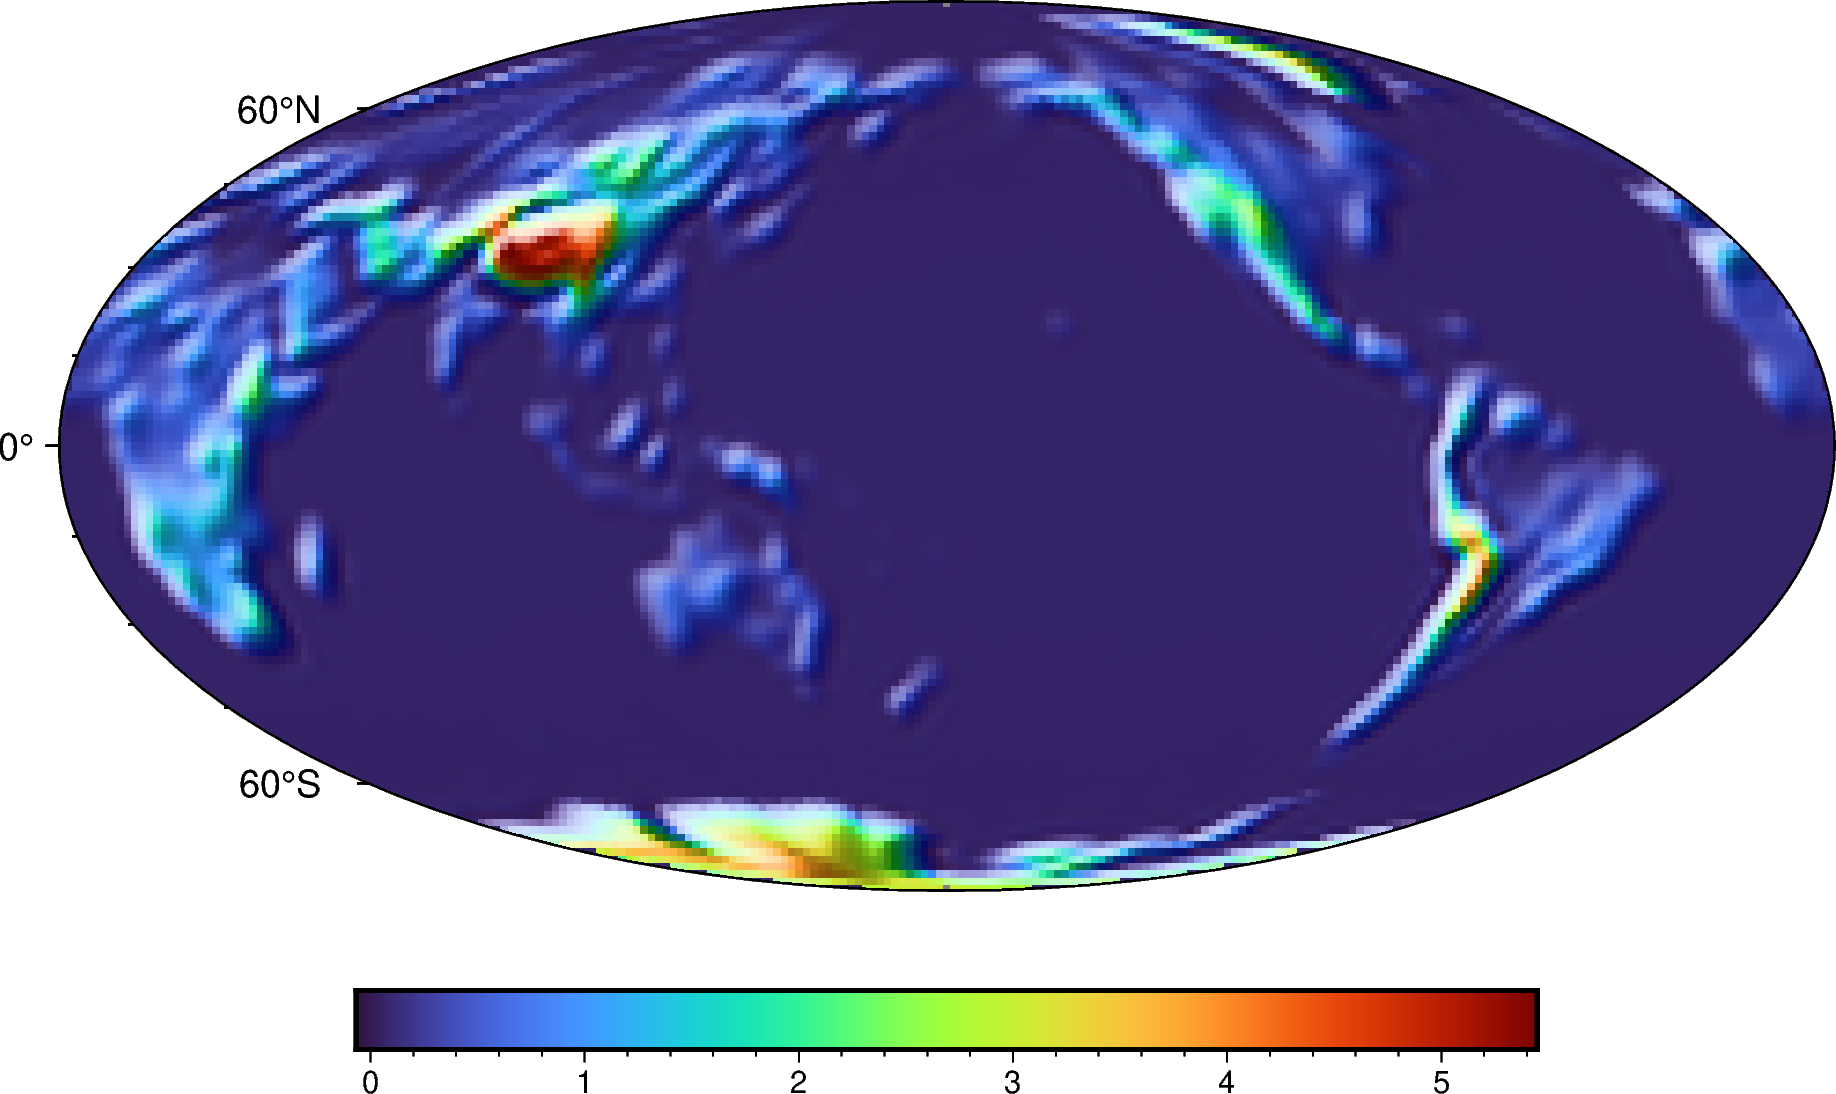

In [19]:
fig.show(width='70%')